In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
faithful = pd.read_csv('dataset/faithful.csv')
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = faithful.drop(columns='eruptions')
target = faithful[['eruptions']]

feature_faith_train, feature_faith_test, target_faith_train, target_faith_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
simple_reg = LinearRegression()

# train the model
X_faith_train = feature_faith_train.to_numpy()
y_faith_train = target_faith_train.to_numpy()

simple_reg.fit(X_faith_train, y_faith_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_faith_train
model = simple_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,-1.939198
1,waiting,0.076638


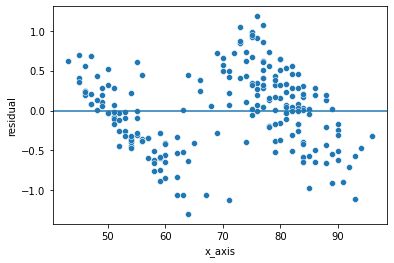

In [ ]:
# calculate residuals
y_predict_train = simple_reg.predict(X_faith_train)
residual = y_faith_train - y_predict_train

#preprocess shape
X_faith_train_flat = np.array([value for nested_array in X_faith_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'x_axis': X_faith_train_flat,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

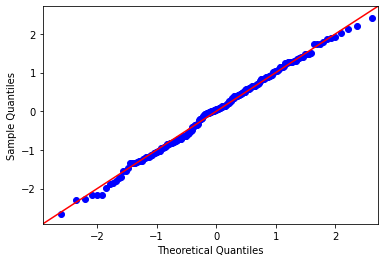

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

# Multiple Regression

In [ ]:
admit = pd.read_csv('dataset/regression_data.csv')
admit.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = admit.drop(columns='admit_prob')
target = admit[['admit_prob']]

feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,gre_score,4.489983
2,toefl_score,3.664298
3,univ_ranking,2.572110
4,motiv_letter_strength,2.785764
5,recommendation_strength,1.977698
6,gpa,4.654540
7,research_exp,1.518065


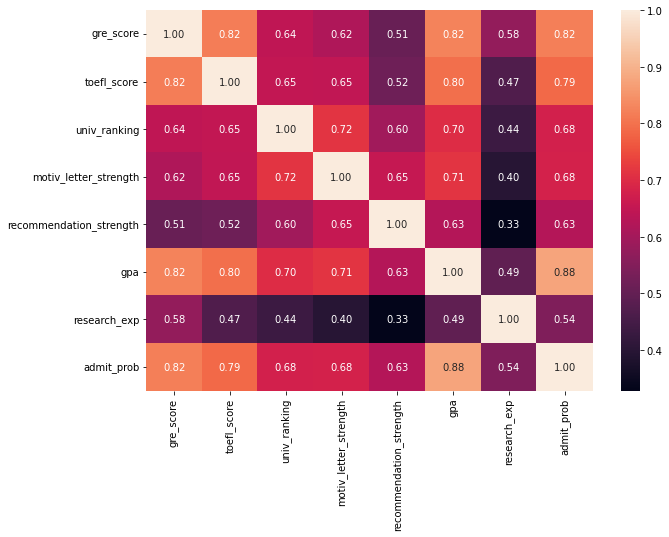

In [ ]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Need to drop:
* gre_score
* toefl_score

In [ ]:
feature_admit_train = feature_admit_train.drop(columns=['gre_score','toefl_score']) 
feature_admit_test = feature_admit_test.drop(columns=['gre_score','toefl_score'])

### Recheck VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,univ_ranking,2.511407
2,motiv_letter_strength,2.748278
3,recommendation_strength,1.965542
4,gpa,2.726281
5,research_exp,1.350514


Good!

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()

multi_reg.fit(X_admit_train, y_admit_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_admit_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,-0.766426
1,univ_ranking,0.006984
2,motiv_letter_strength,0.004346
3,recommendation_strength,0.014776
4,gpa,0.161004
5,research_exp,0.038274


## Model Diagnostic

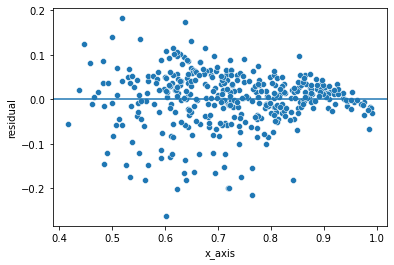

In [ ]:
# calculate residuals
y_predict_train = multi_reg.predict(X_admit_train)
residual = y_admit_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


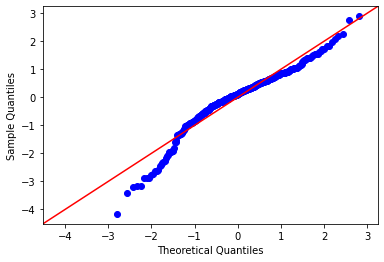

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [ ]:
# R^2 score
from sklearn.metrics import r2_score

r2_score(y_admit_train,y_predict_train)

0.7986824284294715

## Model Evaluation

### Training Error

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_admit_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_admit_train))))

R-squared for training data is 0.7479378982126863
RMSE for training data is 0.06298993296628583


### Testing Error

In [ ]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test = multi_reg.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_admit_test))))

RMSE for testing data is 0.05880540869550097


# Predicting Traffic Volume

In [ ]:
# load data
traffic = pd.read_csv('dataset/traffic_volume.csv')
traffic.head()

,temp,clouds_all,hour,is_weekend,traffic_volume
0,288.28,40,9,0,5545
1,289.36,75,10,0,4516
2,289.58,90,11,0,4767
3,290.13,90,12,0,5026
4,291.14,75,13,0,4918


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = traffic.drop(columns='traffic_volume')
target = traffic[['traffic_volume']]

feature_traffic_train, feature_traffic_test, target_traffic_train, target_traffic_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_traffic_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,temp,1.053743
2,clouds_all,1.043013
3,hour,1.010956
4,is_weekend,1.000504


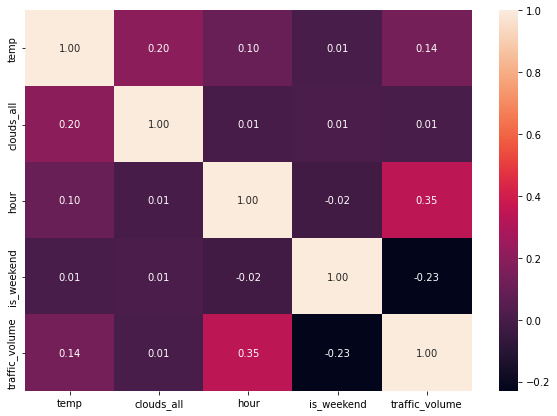

In [ ]:
# heatmap correlation
traffic_train = pd.concat([feature_traffic_train, target_traffic_train], axis=1)
corr = traffic_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

NO need to drop!

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_traffic_train = feature_traffic_train.to_numpy()
y_traffic_train = target_traffic_train.to_numpy()

multi_reg.fit(X_traffic_train, y_traffic_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_traffic_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,-4261.010404
1,temp,24.647144
2,clouds_all,-0.620741
3,hour,95.485123
4,is_weekend,-973.531713


## Model Diagnostic

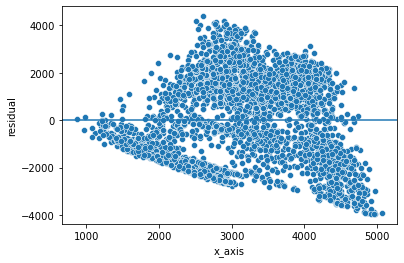

In [ ]:
# calculate residuals
y_predict_train = multi_reg.predict(X_traffic_train)
residual = y_traffic_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


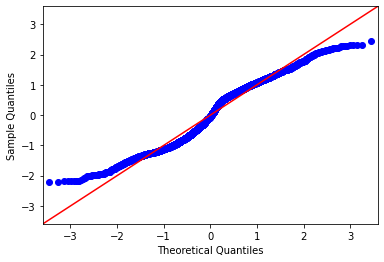

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

In [ ]:
df_resid.head()

,x_axis,residual
0,3626.517337,1456.482663
1,1642.249672,-1281.249672
2,4159.553568,1728.446432
3,3145.212475,2172.787525
4,3767.362707,1896.637293


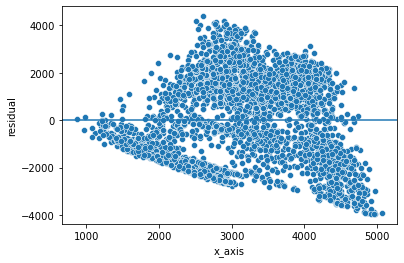

In [ ]:
# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

## Model Evaluation

### Training Error

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_traffic_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_traffic_train))))

R-squared for training data is -3.5300687076030224
RMSE for training data is 1795.6505308964993


### Testing Error

In [ ]:
# prepare prediction result on test data
X_traffic_test = feature_traffic_test.to_numpy()
y_predict_test = multi_reg.predict(X_traffic_test)

# ground truth target
y_traffic_test = target_traffic_test.to_numpy()

In [ ]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_traffic_test))))

RMSE for testing data is 1814.799374169524
